### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.ion()
%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Local Imports

In [3]:
# Paths
from chestxray.config import (PANDA_PATH,
                              MODEL_PATH,
                              PANDA_IMGS,
                              PANDA_MASKS,
                              TRAIN_CSV)

# Viz
from chestxray.visualize import show_from_ids, imshow, reverse_show_img

### Load Data

In [4]:
TRAIN_DF = pd.read_csv(TRAIN_CSV)
TRAIN_DF.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [5]:
suspicious = pd.read_csv(PANDA_PATH/"PANDA_Suspicious_Slides.csv")

In [6]:
suspicious.head()

,image_id,reason
0,1866ab99cc028bbb8ed656f1181215f1,marks
1,3ad48056423f5a0710d13d943f112fe1,marks
2,eb62229279cd8ab73c9ca81171f14762,marks
3,ebc0cf09e9f77d222af0b8015c409a01,marks
4,d6b1c8ca6037b5ddca5d2086975a643b,marks


In [7]:
suspicious.reason.unique()

array(['marks', 'No Mask', 'Background only',
       'No cancerous tissue but ISUP Grade > 0', 'tiss', 'blank'],
      dtype=object)

### Visualize

In [8]:
marks_ids = suspicious.loc[suspicious.reason == "No cancerous tissue but ISUP Grade > 0", "image_id"]

In [9]:
len(marks_ids)

85

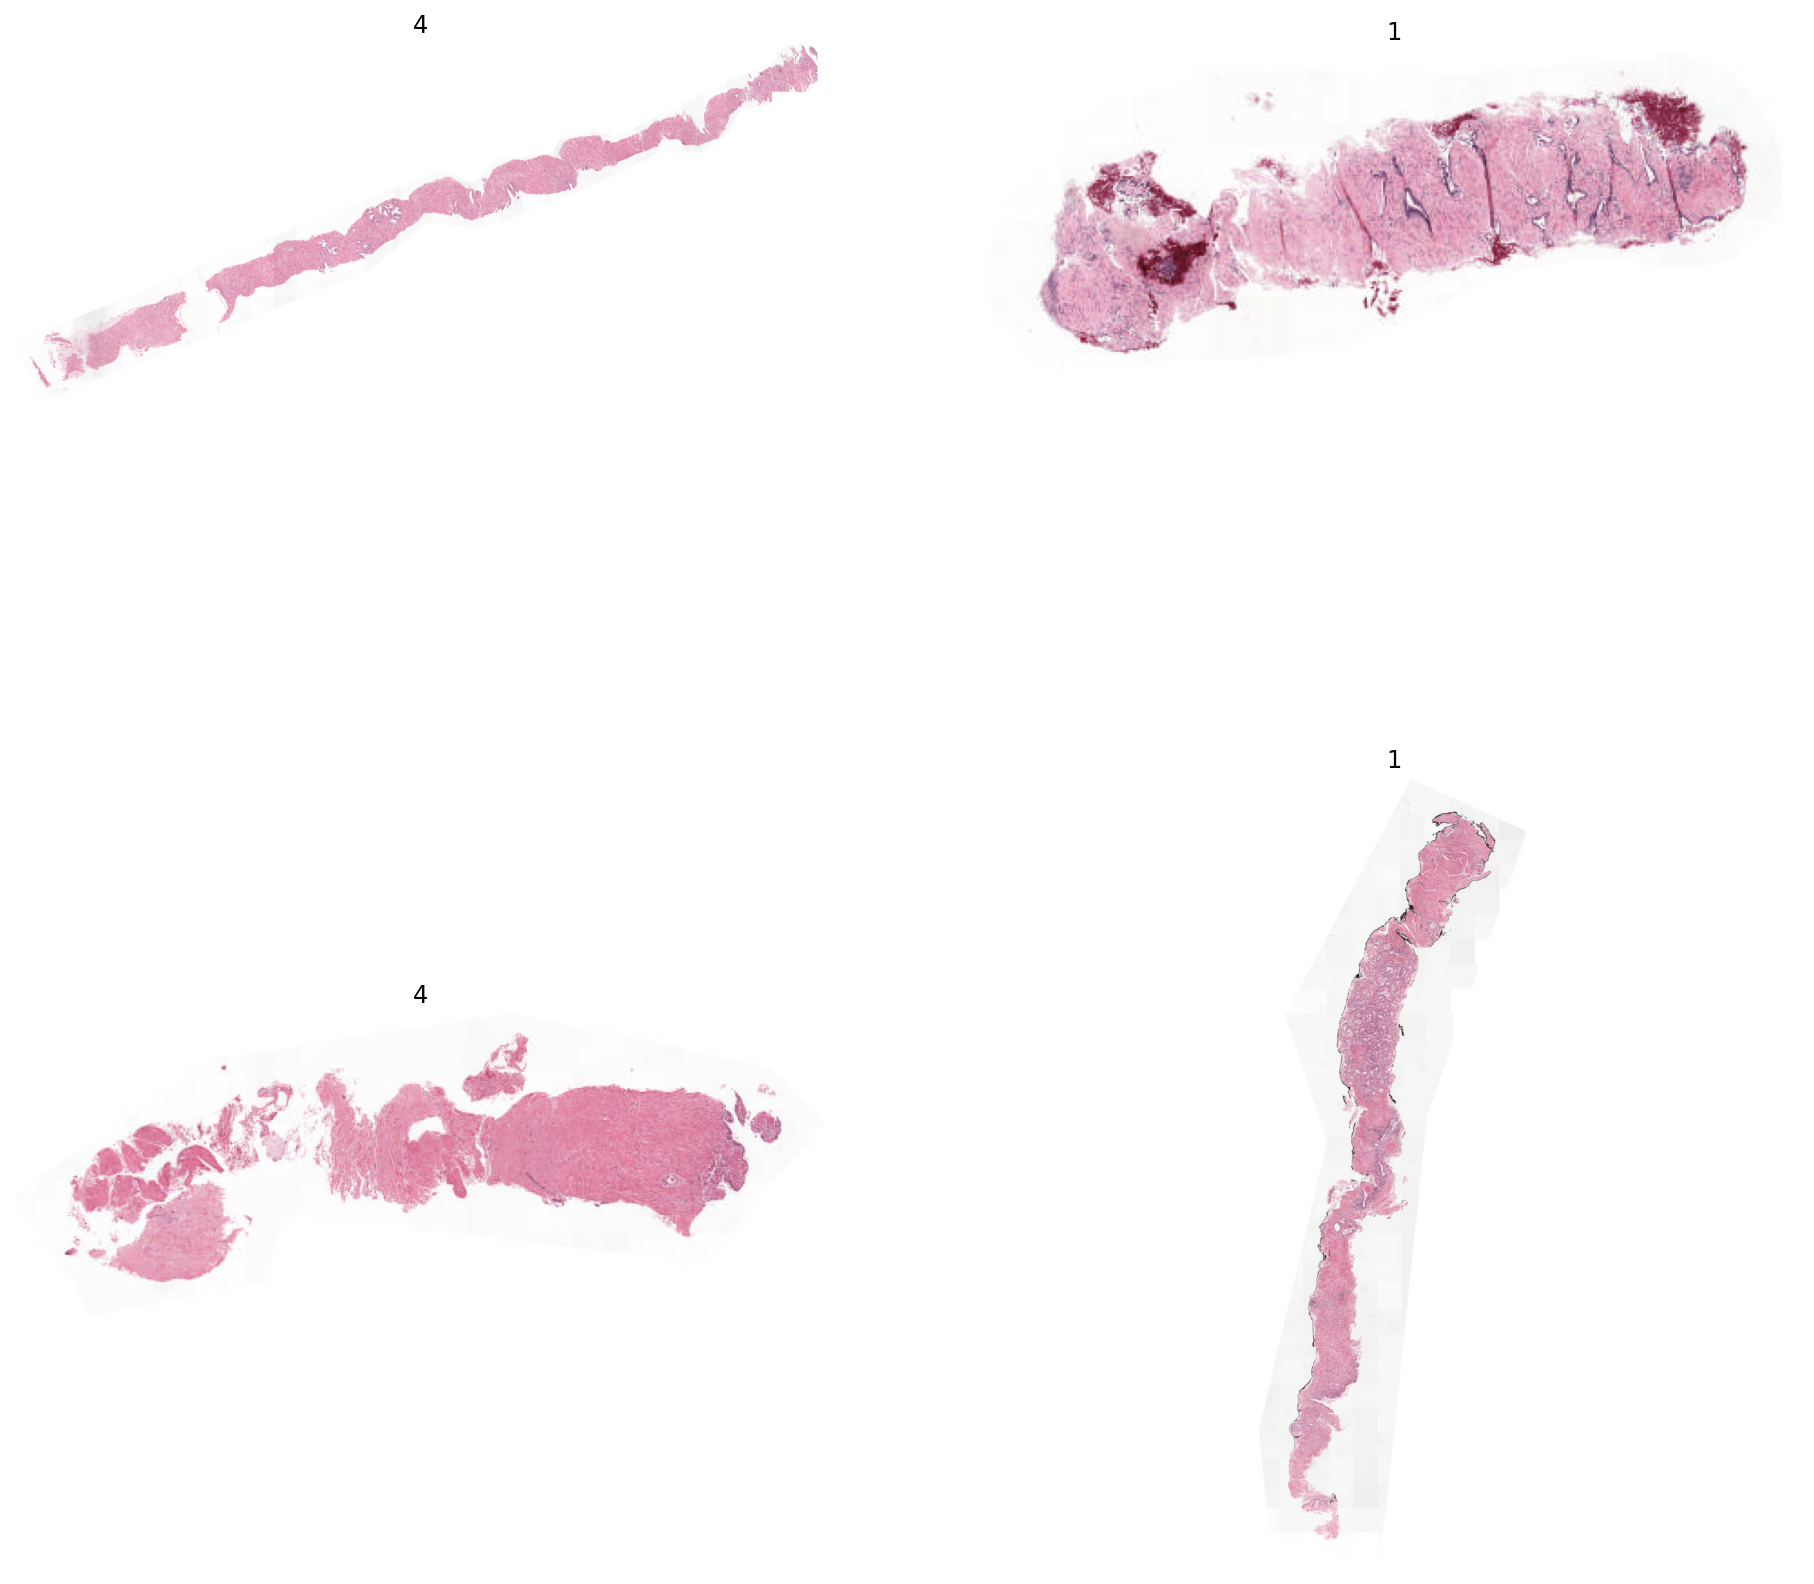

In [10]:
sample = marks_ids.sample(4)
show_from_ids(sample, TRAIN_DF)

In [11]:
sample

634    b10aafff8d0a4c426090fc772b6075f0
611    527d8fc0ea1ef55212f4f2ffd6c4ad68
605    4031bad3ffbcd79f42330f3853bec9b2
626    93f366029ac746d84ea2aea80cc998e8
Name: image_id, dtype: object

To delete:
- marks (probaly all, to easy to overfit)
- empty (3790f55cad63053e956fb73027179707)

### Create TRAIN_DF without empty image and marked images

In [13]:
marks_ids = marks_ids.to_list()

In [15]:
marks_ids.append("3790f55cad63053e956fb73027179707")

In [31]:
folds = pd.read_csv(PANDA_PATH/"folds.csv")

In [36]:
folds = folds[~folds.image_id.isin(marks_ids)]

In [37]:
folds.to_csv(PANDA_PATH/"folds_cleaned.csv", header=True, index=False)

### "No cancerous tissue but ISUP Grade > 0"

In [15]:
# They have cancerous tissue, but most of them are tiny. That is the reason to drop.
folds = pd.read_csv(PANDA_PATH/"folds_dedup.csv")
folds = folds[~folds.image_id.isin(marks_ids)]
folds.to_csv(PANDA_PATH/"folds_dedup_v1.csv", header=True, index=False)

In [16]:
folds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 10060
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image_id       9983 non-null   object
 1   data_provider  9983 non-null   object
 2   isup_grade     9983 non-null   int64 
 3   gleason_score  9983 non-null   object
 4   fold           9983 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 468.0+ KB


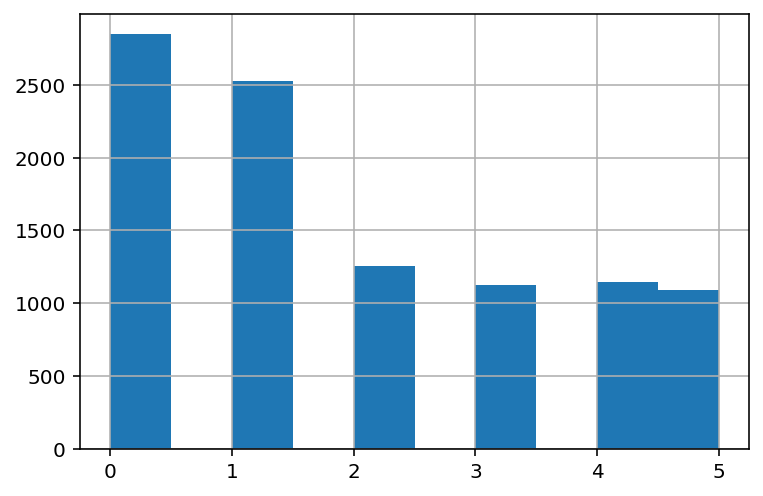

In [17]:
folds.isup_grade.hist()

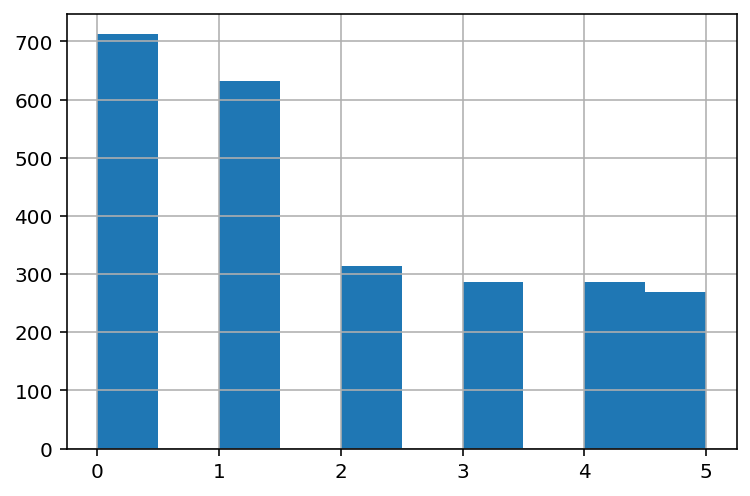

In [19]:
folds.loc[folds.fold == 0, "isup_grade"].hist();

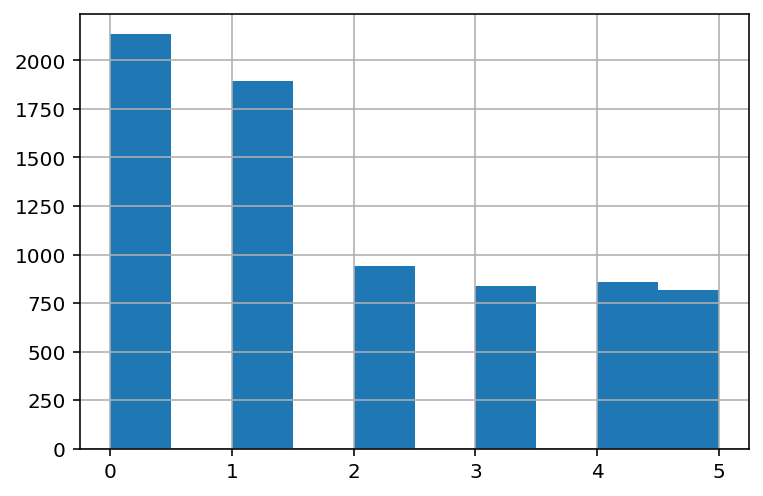

In [20]:
folds.loc[folds.fold != 0, "isup_grade"].hist();